# 1. Getting Data

## 1.1 Setting up and Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Getting data into dataframe

In [2]:
df = pd.read_csv('./Dataset/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## 1.3 Checking for null values

In [3]:
null_col = df.isnull().sum()
null_col[null_col>0]

Series([], dtype: int64)

##### found no null value.

## 1.4 Depicting percentage distribution of label on a pie chart

In [4]:
label_val = df['label'].value_counts()
label_val.shape

(2,)

In [5]:
label = df['label'].unique()
label

array(['male', 'female'], dtype=object)

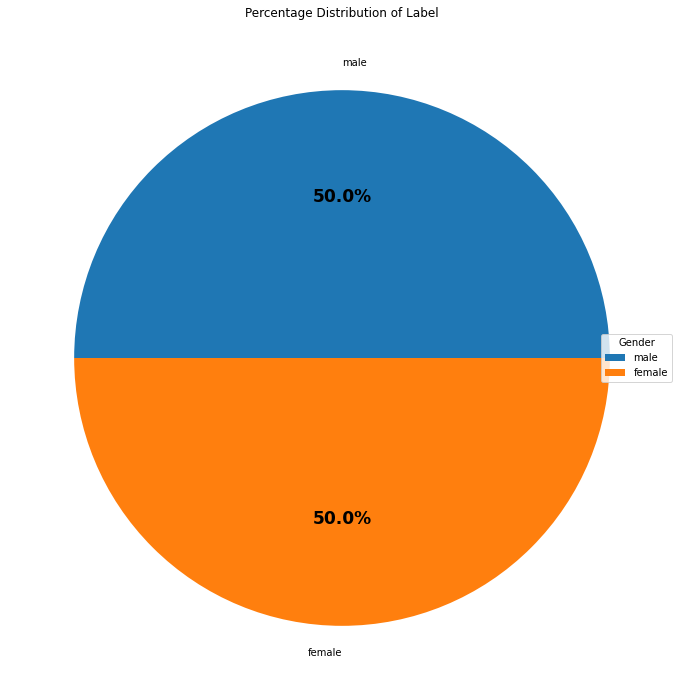

In [47]:
def func(pct, data):
    return "{:.1f}%".format(pct)

fig, ax = plt.subplots(figsize = (12, 16))

wedges, texts, autotexts = ax.pie(label_val, labels = label, startangle=360, autopct = lambda pct: func(pct, label_val))
# Adding legend
ax.legend(wedges, label,
          title="Gender",
          loc="center right")

plt.setp(autotexts, size= 17, weight="bold")
ax.set_title("Percentage Distribution of Label")

# show plot
plt.show()

#### This shows that dataset consist of 50% male and 50% female voice samples

## 1.5 Spliting data into training and testing dataset

### 1.5.1 Before spliting data conveting categorical data into numerical encoding
here I am using Label encoding to tranform Label col from string to numerical value

In [7]:
# importing labelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [8]:
# checking categorical data
cat_col = df.dtypes[df.dtypes=='object'].index
print(cat_col) # we only have one categorical datatype column

Index(['label'], dtype='object')


In [9]:
# Conveting categorical data into numerical encoding
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])
print(df['label']) # we get 1 for male and 0 for female

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int32


In [10]:
# checking df types
df.dtypes # we only have numerical datatype

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

### 1.5.2 Spliting data in x and y

In [11]:
# spliting df into independent feature ( x ) and dependent feature ( y )
x = df.drop('label', axis=1)
y = df['label']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(3168, 20)
(3168,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### 1.5.3 Spliting data in training and testing

#### Importing train_test_split to split data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # taking test size as 20%
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


## 2. Creating Models

### Creating evaluation function

#### Importing for evaluation our ML score

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# for hyperperemetertuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
# Creating function for model score
import seaborn as sns
def modelScore(model):
    print('Training Score', model.score(x_train, y_train))
    print('Testing Score', model.score(x_test, y_test))

def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    class_label = ["Female", "Male"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

def eval_metric(true_v, pred_v):
    print("\t Confusion Matrix: \n")
    confusion_matrix_c(true_v, pred_v)
    print("\n\tClassification Report: \n", classification_report(true_v, pred_v))
    print("\n\tAccuracy Score: ", accuracy_score(true_v, pred_v))
    


## 2.1         Decision Tree Classifier

In [16]:
# Importing DT classifier
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=12, random_state=42)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=12, random_state=42)

In [17]:
modelScore(DT_model)

Training Score 0.9932912391475928
Testing Score 0.9574132492113565


In [18]:
y_pred_dt = DT_model.predict(x_test)

	 Confusion Matrix: 



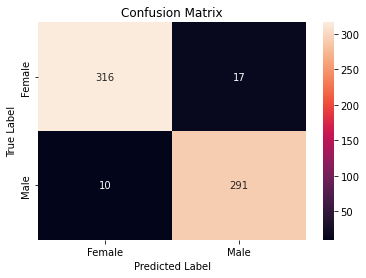


	Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       333
           1       0.94      0.97      0.96       301

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634


	Accuracy Score:  0.9574132492113565


In [19]:
# confusion_matrix_c(y_test, y_pred_dt)
# print(classification_report(y_test, y_pred_dt))
eval_metric(y_test,y_pred_dt)

#### using RandomizedSearchCV

In [20]:
## RandomizedSearchCV
#Creating hyperperameter grid
para_grid = {"max_depth":range(1,17,2),
             'max_features':range(1, 15, 2),
             'min_samples_split':range(0, 20, 2),
             'criterion': ['gini', 'entropy']}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Instantiating RandomizedSearchCV object
DTcv_model = RandomizedSearchCV(tree, para_grid, cv=8, scoring='accuracy')

DTcv_model.fit(x_train, y_train)

# Printing the tuned parameter and best score
print("Tuned Decision Tree Parameters: {}".format(DTcv_model.best_params_))
print("Best Score is {}".format(DTcv_model.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 12, 'max_features': 13, 'max_depth': 9, 'criterion': 'entropy'}
Best Score is 0.9664626841832049


In [21]:
y_pred_tunedDT = DTcv_model.predict(x_test)

Training Score 0.9913180741910024
Testing Score 0.9605678233438486


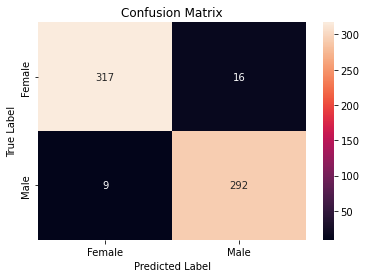

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       333
           1       0.95      0.97      0.96       301

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

0.9605678233438486


In [22]:
modelScore(DTcv_model)
confusion_matrix_c(y_test, y_pred_tunedDT)
print(classification_report(y_test, y_pred_tunedDT))
print(accuracy_score(y_test, y_pred_tunedDT))

###### ON THE ABOVE MODEL DTcv_model getting an accurecy of 96%

## 2.2 Random forest Classifier

In [23]:
## imports
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=5, criterion='gini', 
                                  min_samples_split=2,
                                  max_features='auto')

RF_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [24]:
modelScore(RF_model)

Training Score 0.9964483030781374
Testing Score 0.9779179810725552


	 Confusion Matrix: 



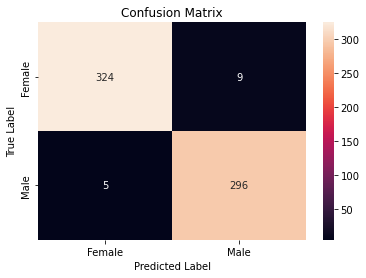


	Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       333
           1       0.97      0.98      0.98       301

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


	Accuracy Score:  0.9779179810725552


In [25]:
y_pred_RF = RF_model.predict(x_test)
eval_metric(y_test,y_pred_RF)

In [26]:
## RandomizedSearchCV
#Creating hyperperameter grid
para_grid = {'n_estimators': [5, 50, 100, 125, 150],
             'min_samples_split':range(2, 20, 3),
             'criterion': ['gini', 'entropy']}

# Instantiating Random Forest classifier
tree = RandomForestClassifier(random_state=42)

# Instantiating RandomizedSearchCV object
RF_cvmodel = RandomizedSearchCV(tree, para_grid, cv=10, scoring='f1_micro', n_jobs=-1)

RF_cvmodel.fit(x_train, y_train)

# Printing the tuned parameter and best score
print("Tuned Decision Tree Parameters: {}".format(RF_cvmodel.best_params_))
print("Best Score is {}".format(RF_cvmodel.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 100, 'min_samples_split': 8, 'criterion': 'gini'}
Best Score is 0.977509258971087


In [27]:
RF_best_model = RandomForestClassifier(n_estimators= 100, min_samples_split=5, criterion='entropy', random_state=42)
RF_best_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)

In [28]:
modelScore(RF_best_model)

Training Score 0.999605367008682
Testing Score 0.9794952681388013


	 Confusion Matrix: 



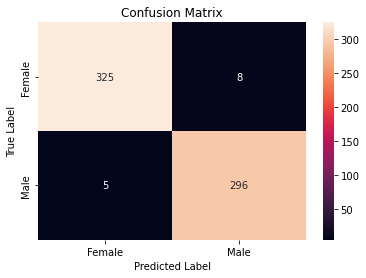


	Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.97      0.98      0.98       301

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


	Accuracy Score:  0.9794952681388013


In [29]:
y_pred_RF_best_model = RF_best_model.predict(x_test)
eval_metric(y_test,y_pred_RF_best_model)

#### Getting same for accuacy score for both Random Forest Model with accuracy at 97.9%

## 2.3 KNN Classifier

In [30]:
# Importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

	 Confusion Matrix: 



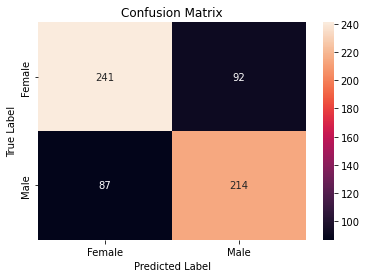


	Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73       333
           1       0.70      0.71      0.71       301

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634


	Accuracy Score:  0.7176656151419558


In [32]:
Y_pred_knn = model_knn.predict(x_test)
eval_metric(y_test, Y_pred_knn)

#### Getting 71% accuracy score in the KNN classifier

## 2.4  Logistic Regression

In [41]:
## Imports
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(C=3.65,penalty='l1',random_state=42, solver='liblinear')
model_LR.fit(x_train, y_train)

LogisticRegression(C=3.65, penalty='l1', random_state=42, solver='liblinear')

	 Confusion Matrix: 



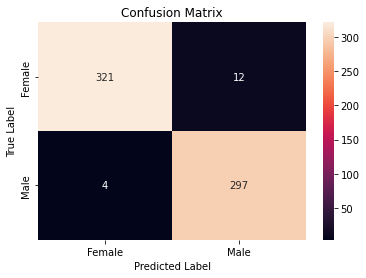


	Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       333
           1       0.96      0.99      0.97       301

    accuracy                           0.97       634
   macro avg       0.97      0.98      0.97       634
weighted avg       0.98      0.97      0.97       634


	Accuracy Score:  0.9747634069400631


In [42]:
y_pred_LR = model_LR.predict(x_test)
eval_metric(y_test, y_pred_LR)

In [43]:
modelScore(model_LR)

Training Score 0.9727703235990529
Testing Score 0.9747634069400631


### Getting Accuracy score of 97.4% for Logistic Regression Model

## 2.5    SVM Classifier

In [36]:
#imports
from sklearn.svm import SVC
model_svc = SVC(C = 2, kernel='linear', gamma=1)
model_svc.fit(x_train, y_train)

SVC(C=2, gamma=1, kernel='linear')

	 Confusion Matrix: 



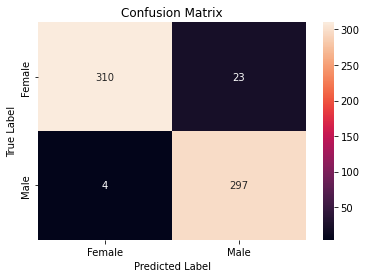


	Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       333
           1       0.93      0.99      0.96       301

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634


	Accuracy Score:  0.9574132492113565


In [37]:
y_pred_svcL = model_svc.predict(x_test)
eval_metric(y_test, y_pred_svcL)

In [38]:
modelScore(model_svc)

Training Score 0.9609313338595107
Testing Score 0.9574132492113565


#### SVM giving a mode with accuracy of 96%

## 3. Model With Best Accuracy

### RF_best_model provided the best Accuracy using Random forest Classifier and RandomizedSearchCV to get an accuracy of 97% with following parameters
RandomForestClassifier(n_estimators= 100, min_samples_split=5, criterion='entropy', random_state=42)